# Data exploration  - Snakeclef2021

**About:**

- This notebook is focus on explore the original  dataset  from [snakeclef2021](https://www.aicrowd.com/challenges/snakeclef2021-snake-species-identification-challenge).
---
David Andrés Torres Betancour <br/>
Computer Engineering  Student <br/>
University of Antioquia <br/>
davida.torres@udea.edu.co

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import time
%matplotlib inline

## Tools

In [20]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def checkIfFileExist(file_name):
    return os.path.exists(os.path.abspath(file_name))

def credentialsUploaded():
  first_time = True;
  waiting_time = 0
  print()
  while checkIfFileExist('kaggle.json')==False and  waiting_time<180:
      if first_time:
        print(bcolors.BOLD + "Upload kaggle.json file following the above instructions ^^^^^^^^\n " + bcolors.ENDC)   
        print(bcolors.WARNING + "Waiting user upload kaggle.json file in root folder\n" + bcolors.ENDC)  
        first_time = False
      time.sleep(2)
      waiting_time +=2
  if waiting_time>=120:
      raise Exception("kaggle.json file has not been uploaded") 
  print(bcolors.OKGREEN + " kaggle.json file uploaded!" + bcolors.ENDC)   
  os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd() #Setup kaggle.json dir

def relocateData():
    !tar -xf snakeclef2021.zip -v
    !del snakeclef2021.zip 
    !mkdir kaggle_data
    !move data kaggle_data
    !move data.csv kaggle_data 


def unzipData():
    !tar -xf snakeclef2021.zip -v
    !del snakeclef2021.zip 

def fetchDatasetFromKaggle(dataset_name, force_fetch=False):
    
  print(bcolors.BOLD + "Fetching data from kaggle ( This may take some time)..." + bcolors.ENDC)   
  if force_fetch==True:
   ! kaggle datasets download -d deividt/{dataset_name} --force #Download dataset
         
   process_info=! kaggle datasets download -d deividt/{dataset_name} --force #Download dataset
   if "100%" in list(process_info)[-1]:
       print(bcolors.OKGREEN + "Data from kaggle successfully fetch\n" + bcolors.ENDC)
       print(bcolors.BOLD + "Unzipping data... s\n" + bcolors.ENDC)
       unzipData()
       print(bcolors.BOLD + "Relocating data... s\n" + bcolors.ENDC)
       relocateData()
       print(bcolors.OKGREEN + "Data is ready in your local folder!\n" + bcolors.ENDC)
   elif "404 - Not Found" in list(process_info)[0]: 
       print(bcolors.FAIL + "404 - Dataset  Not Found in 'deividt' Account\n" + bcolors.ENDC)
   else:
       assert False,list(process_info)[-1]

  else:
    
    if checkIfFileExist("kaggle_data"):
       print(bcolors.WARNING + "Data already exists locally in 'kaggle_data' folder\nIf you want force fetch set force_fetch parameter to True" + bcolors.ENDC)
       return
    process_info =  ! kaggle datasets download -d deividt/{dataset_name} 
    if "Skipping" in list(process_info)[0]:
       print(bcolors.WARNING + "Data already exists locally\nIf you want force fetch set force_fetch parameter to True" + bcolors.ENDC)
    elif "100%" in list(process_info)[-1]:
        print(bcolors.OKGREEN + "Data from kaggle successfully fetch\n" + bcolors.ENDC)
        print(bcolors.BOLD + "Unzipping data... s\n" + bcolors.ENDC)
        unzipData()
        print(bcolors.BOLD + "Relocating data... s\n" + bcolors.ENDC)
        relocateData()
        print(bcolors.OKGREEN + "Data is ready in  kaggle_data folder!\n" + bcolors.ENDC)
    elif "404 - Not Found" in list(process_info)[0]: 
        print(bcolors.FAIL + "404 - Dataset  Not Found in 'deividt' Account\n" + bcolors.ENDC)
    else:
        assert False,list(process_info)[-1]

def missingValues(dataF):
  '''
  Description:
    Returns the reversed String.

  Parameters:
      None.

  Returns:
      reverse(str1):The string which gets reversed.   
  '''
  k = dataF.isna().sum()
  miss_values = k[k!=0]
  if miss_values.size>0:
    return (miss_values)
  return ("No missing values")


def selectRandomBreeds(dataF,num_breeds=5):

  labels=pd.unique(dataF.binomial).tolist()
  np.random.shuffle(labels)
  return labels[:num_breeds]
  

def displayImagesForRandomBreeds(df,num_breeds = 5, num_imgs_forbreed= 2):
  labels = selectRandomBreeds(df,num_breeds)
  for label in labels:
    sub_df=df[df.binomial==label]
    sub_df=sub_df.sample(frac=1)[:num_imgs_forbreed]
    img_paths=sub_df.image_path.tolist()
    
    f, axarr = plt.subplots(1,num_imgs_forbreed)

    for i,img in enumerate(img_paths):
      path_ ="kaggle_data/data/"+img.split('/')[-1]
      
      img = cv2.imread(path_)
    
      img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      axarr[i].imshow(img)
      axarr[i].title.set_text(f'{img.shape}')
    plt.suptitle(f"Breed: {label}")
    plt.show()
  

## Data exploration

- Reading main .csv file

In [6]:
df = pd.read_csv(os.path.abspath('data_csv/data.csv'))

- First  samples

In [5]:
df.head(5)

,binomial,country,continent,genus,family,UUID,source,subset,class_id,image_path
0,Pantherophis spiloides,United States of America,North America,Pantherophis,Colubridae,fbc816e9552643a2bce4f655b2f3c4e1,inaturalist,train,523,/Datasets/SnakeCLEF-2021/inaturalist/fbc816e95...
1,Masticophis taeniatus,United States of America,North America,Masticophis,Colubridae,cbc7ad7141a642f2b92ef7fe05c9d608,inaturalist,train,430,/Datasets/SnakeCLEF-2021/inaturalist/cbc7ad714...
2,Crotalus pyrrhus,United States of America,North America,Crotalus,Viperidae,fc4db72953ae4c978ac50acb33adce0c,inaturalist,train,183,/Datasets/SnakeCLEF-2021/inaturalist/fc4db7295...
3,Haldea striatula,United States of America,North America,Haldea,Colubridae,2068c79c956d43dc8a45106e0c808aed,inaturalist,train,305,/Datasets/SnakeCLEF-2021/inaturalist/2068c79c9...
4,Natrix natrix,Russia,Europe,Natrix,Colubridae,3e376aaf4f8d42e991c0c8ddc5972f95,inaturalist,train,471,/Datasets/SnakeCLEF-2021/inaturalist/3e376aaf4...


- Last samples

In [6]:
df.tail(5)

,binomial,country,continent,genus,family,UUID,source,subset,class_id,image_path
386001,Storeria dekayi,United States of America,North America,Storeria,Colubridae,f0a50a4676a34a2f99c3cb2451c6acd5,inaturalist,val,661,/Datasets/SnakeCLEF-2021/inaturalist/f0a50a467...
386002,Thamnophis sirtalis,United States of America,North America,Thamnophis,Colubridae,4513bbe7752d49dabdff2dd6484c82fc,inaturalist,val,706,/Datasets/SnakeCLEF-2021/inaturalist/4513bbe77...
386003,Thamnophis sirtalis,Canada,North America,Thamnophis,Colubridae,fca4ce9644b84454bf2d2967bbfd6597,inaturalist,val,706,/Datasets/SnakeCLEF-2021/inaturalist/fca4ce964...
386004,Pantherophis obsoletus,United States of America,North America,Pantherophis,Colubridae,4650fd94cdc14861a7e12014fcd47520,herpmapper,val,520,/Datasets/SnakeCLEF-2021/herpmapper/4650fd94cd...
386005,Azemiops feae,China,Asia,Azemiops,Viperidae,5a8a20934d91477f84902d2479aebdc0,flickr,val,53,/Datasets/SnakeCLEF-2021/flickr/5a8a20934d9147...


- Missing values in columns

In [7]:
missingValues(df)

'No missing values'

- Data types

In [8]:
for c in df.columns:
    print ("%20s"%c, df[c].dtype)

            binomial object
             country object
           continent object
               genus object
              family object
                UUID object
              source object
              subset object
            class_id int64
          image_path object


- Data Size

In [9]:
df.shape

(386006, 10)

- Breeds:

In [10]:
print(pd.unique(df['binomial']));

['Pantherophis spiloides' 'Masticophis taeniatus' 'Crotalus pyrrhus'
 'Haldea striatula' 'Natrix natrix' 'Pseudechis australis'
 'Ptyas dhumnades' 'Thamnophis elegans' 'Bothrops asper' 'Boa constrictor'
 'Thamnophis proximus' 'Storeria storerioides' 'Naja sumatrana'
 'Thamnophis sirtalis' 'Opheodrys aestivus' 'Crotalus adamanteus'
 'Pituophis catenifer' 'Epicrates cenchria' 'Crotalus horridus'
 'Daboia mauritanica' 'Storeria dekayi' 'Nerodia erythrogaster'
 'Diadophis punctatus' 'Thamnophis hammondii' 'Crotalus atrox'
 'Pantherophis alleghaniensis' 'Nerodia rhombifer' 'Zamenis scalaris'
 'Lampropeltis californiae' 'Malpolon monspessulanus' 'Nerodia sipedon'
 'Sanzinia madagascariensis' 'Vipera seoanei' 'Hierophis viridiflavus'
 'Trimeresurus albolabris' 'Agkistrodon contortrix' 'Austrelaps superbus'
 'Crotalus molossus' 'Thamnophis ordinoides' 'Zamenis longissimus'
 'Morelia viridis' 'Crotalus scutulatus' 'Charina bottae'
 'Erythrolamprus miliaris' 'Pantherophis emoryi' 'Thamnophis mar

- Total breeds:

In [11]:
len ( pd.unique(df['binomial']))

772

- Total images for each breed : 

In [12]:
df['binomial'].value_counts()

Thamnophis sirtalis        22163
Storeria dekayi            17535
Pantherophis obsoletus     13012
Crotalus atrox             12344
Nerodia sipedon            12211
                           ...  
Ophryacus undulatus           22
Bolyeria multocarinata        21
Orientocoluber spinalis       18
Philodryas baroni             12
Achalinus formosanus          10
Name: binomial, Length: 772, dtype: int64

- Data density:

C:\Users\datcx\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


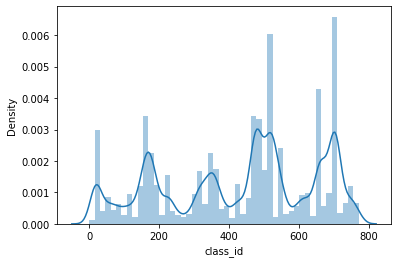

In [13]:
sns.distplot(df['class_id']);

### Visualizating Images

#### Loading data

 - In order to use the Kaggle’s public API, you must first authenticate using an API token. For that follow the next steps: <br/> <br/>
     1. Go to https://www.kaggle.com/
     2. Click on your user profile picture
     3. Then on "Account" from the dropdown menu. This will take you yo your account settings
     4. Scroll down to the section of the page labelled API
     5. To create a new token, click on the “Create New API Token” button. This will download a fresh authentication token onto your machine named "kaggle.json"
     6.  <font color='red'>YOU MUST UPLOAD kaggle.json FILE in the ROOT FOLDER/)</font> 



In [7]:
credentialsUploaded()


 kaggle.json file uploaded!


- Downloading original dataset [snakeclef2021](https://www.kaggle.com/deividt/snakeclef2021) from Kaggle. 
<br/>
<font color='red'>Fetching data and unzipping files can take several minutes ( at least 30 min)  </font> 
<br/>


In [10]:
fetchDatasetFromKaggle( dataset_name = "snakeclef2021")

Fetching data from kaggle ( This may take some time)...
Data already exists locally in 'kaggle_data' folder
If you want force fetch set force_fetch parameter to True


- Display images for random breeds :

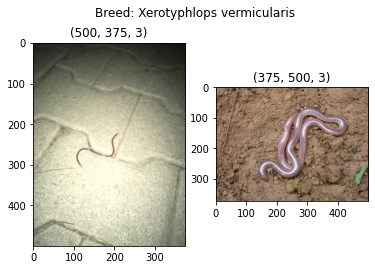

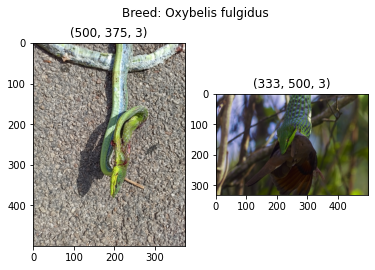

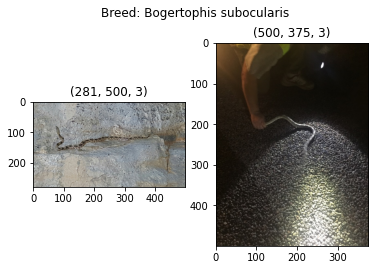

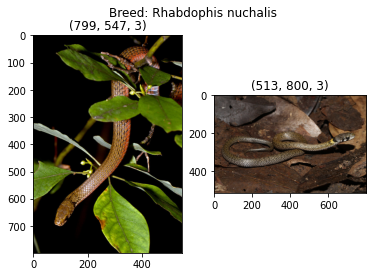

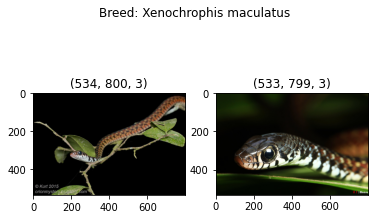

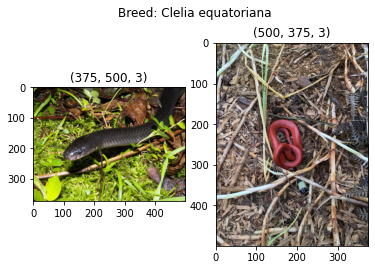

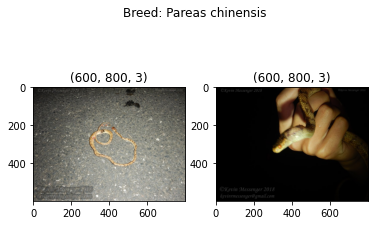

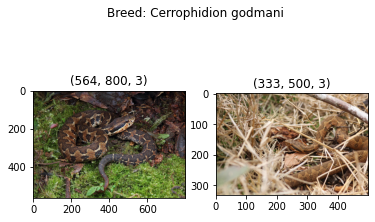

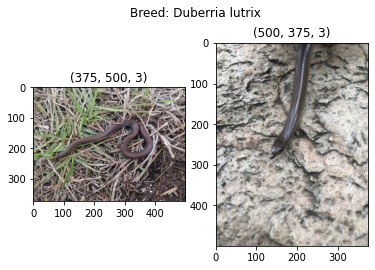

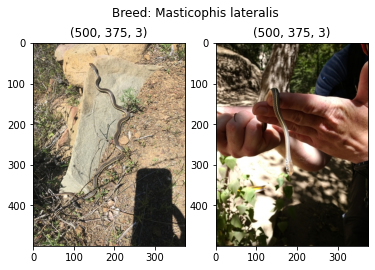

In [25]:
displayImagesForRandomBreeds(df,num_breeds = 10, num_imgs_forbreed= 2)